# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

- Loan default is a significant risk factor in the financial sector. When borrowers fail to repay their loans, lenders suffer financial losses. Financial institutions must evaluate risk accurately to maintain economic stability.

### **The objective:**

 - The goal of this project is to build a predictive model that can accurately classify whether a loan applicant is likely to default (BAD = 1) or not (BAD = 0). By using machine learning, we aim to assist financial institutions in making more informed, data-driven lending decisions, thereby minimizing financial risk and improving credit allocation efficiency.

### **The key questions:**

- What are the most important factors that predict loan default?

- Can we reliably classify applicants into defaulters and non-defaulters using historical data?

- Which machine learning model offers the best balance of accuracy and recall, especially for identifying true defaulters?

- Are there particular applicant profiles or loan characteristics that are highly associated with default risk?

### **The problem formulation**:

- This is a supervised binary classification problem. Using historical loan data with labeled outcomes (defaulted vs. not), we aim to develop and evaluate multiple machine learning models to predict the likelihood of default for new loan applicants. The target variable is BAD, where 1 indicates default and 0 indicates no default. The solution should help automate risk assessment and optimize lending decisions.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [ ]:
# Load the Dataset
mydata = pd.read_csv('/content/drive/MyDrive/MIT/Capstone_project/hmeq.csv')

In [ ]:
loan_pred = mydata.copy()

In [ ]:
loan_pred.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
loan_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


- The dataset has 5960 entries and 13 columns.
- The dataset shows that most columns have missing values, only the first two columns 'BAD' and 'LOAN' have no missing values. The last column, 'DEBTINC,' has the most missing values with only 4693 non-null values.
- The dataset also consists of multiple data types,
  - The columns BAD and LOAN are integers
  - The columns MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, and DEBTINC are float numbers
  - The columns REASON and JOB are objects

In [ ]:
# Calculate missing value percentages for all columns
missing_percentages = loan_pred.isnull().mean() * 100

# Print results for each column
for col, perc in missing_percentages.items():
    print(f"Percentage of missing values in '{col}' column: {perc:.2f}%")

Percentage of missing values in 'BAD' column: 0.00%
Percentage of missing values in 'LOAN' column: 0.00%
Percentage of missing values in 'MORTDUE' column: 8.69%
Percentage of missing values in 'VALUE' column: 1.88%
Percentage of missing values in 'REASON' column: 4.23%
Percentage of missing values in 'JOB' column: 4.68%
Percentage of missing values in 'YOJ' column: 8.64%
Percentage of missing values in 'DEROG' column: 11.88%
Percentage of missing values in 'DELINQ' column: 9.73%
Percentage of missing values in 'CLAGE' column: 5.17%
Percentage of missing values in 'NINQ' column: 8.56%
Percentage of missing values in 'CLNO' column: 3.72%
Percentage of missing values in 'DEBTINC' column: 21.26%


In [ ]:
# Duplicated values
print(loan_pred.duplicated().sum())

0


There are no duplicated values in the dataset!

## Summary Statistics

In [ ]:
numbered_cols = loan_pred.select_dtypes(include=['number'])
numbered_cols.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Above is the summary statistics table for all of the numeric columns in the dataset. It consists of the count of entries for each column, the mean, standard deviation, max, min, and the interquartile ranges.

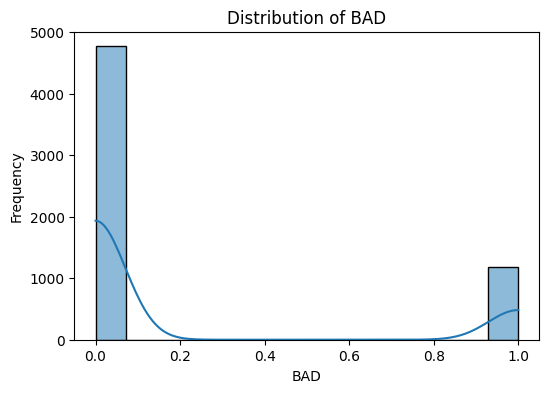

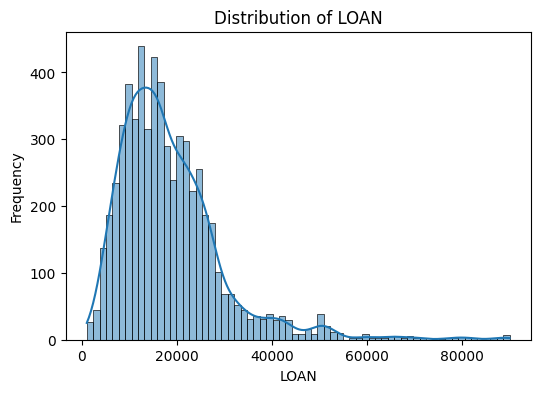

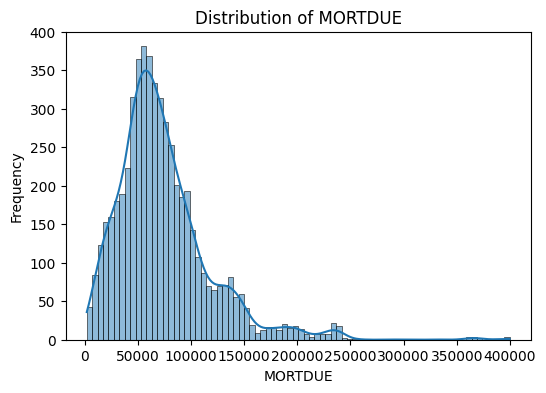

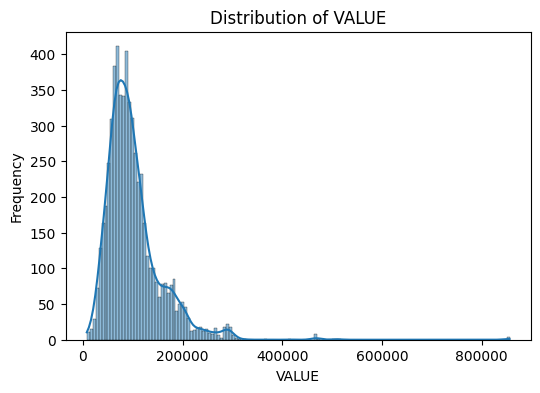

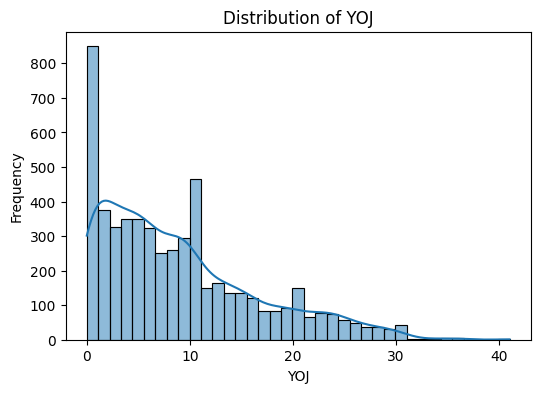

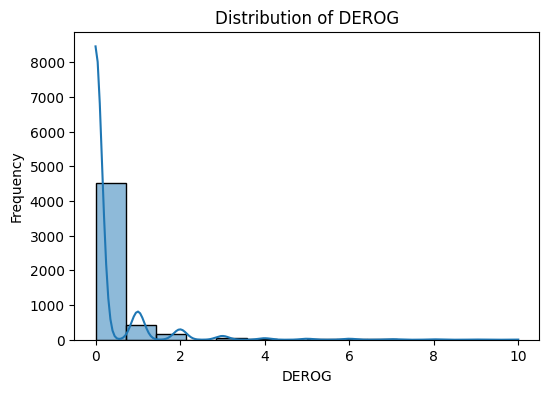

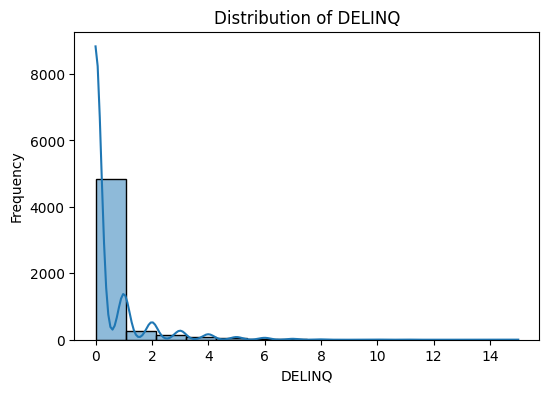

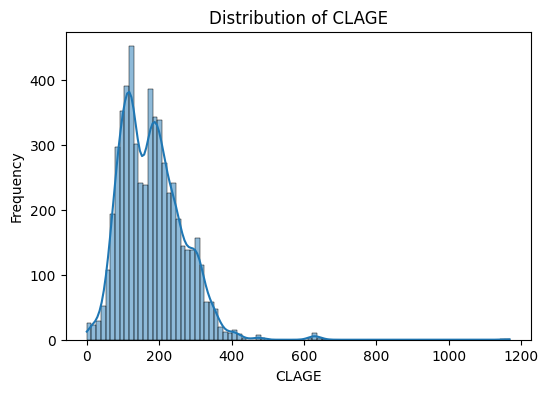

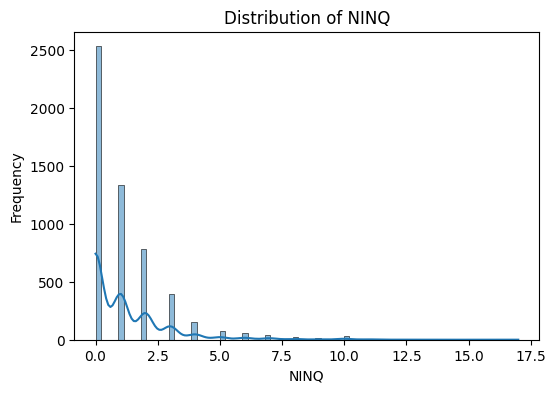

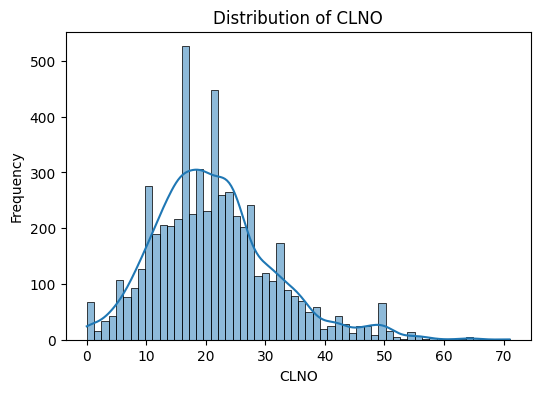

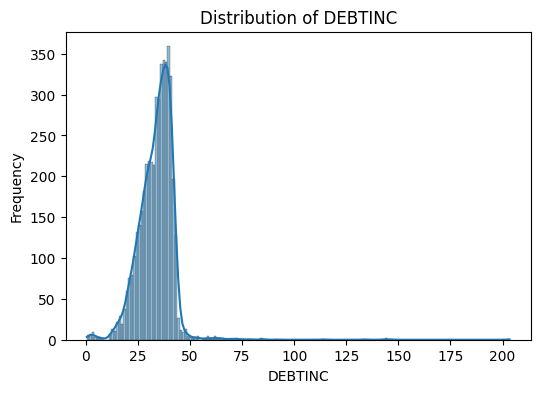

In [ ]:
for col in numbered_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(loan_pred[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Most of the numeric columns are right skewed meaning most of the values exist in the lower number values while some of the columns display a normal distribution like shape.

In [ ]:
non_numeric_cols = loan_pred.select_dtypes(exclude=np.number).columns
loan_pred[non_numeric_cols].describe().T

,count,unique,top,freq
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


The above table is the summary stats for the non-numeric columns.
- REASON has 5708 entries with 2 unique values. The most frequent entry is DebtCon.
- JOB has 5681 entries with six unique entries. The most frequent entry is 'Other'.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [ ]:
loan_range = loan_pred['LOAN'].min(), loan_pred['LOAN'].max()
print(f"Range of loan amounts: {loan_range}")

Range of loan amounts: (1100, 89900)


The minimum amount of loan approved is 1,100 and the maximum loan approved is 89,900

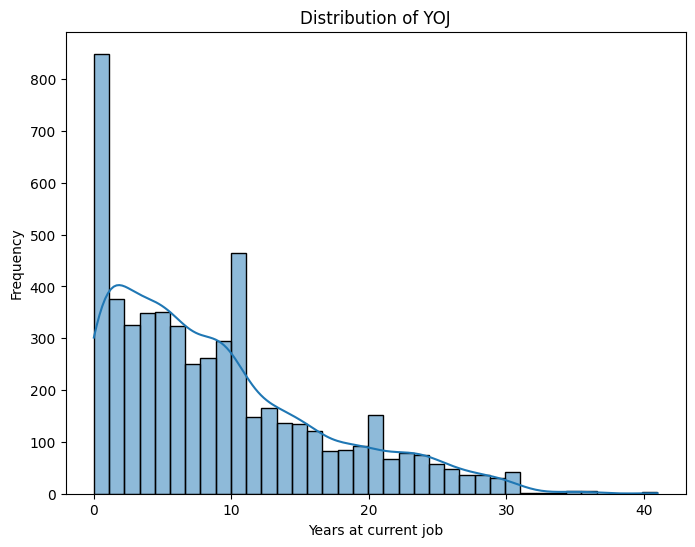

In [ ]:
plt.figure(figsize=(8, 6))  # Increased figure size for better visibility
sns.histplot(loan_pred['YOJ'].dropna(), kde=True) # Drop NA values for plotting
plt.title(f'Distribution of YOJ')
plt.xlabel('Years at current job')
plt.ylabel('Frequency')
plt.show()

The histogram above shows the distribution of years at the current job. The distribution is slightly right-skewed, indicating that most individuals have been at their jobs for only a few years.

In [ ]:
count_of_unique_reasons =loan_pred['REASON'].nunique()
print(f"Number of unique reasons: {count_of_unique_reasons}")
unique_reasons =loan_pred['REASON'].unique()
print(f"Number of unique reasons: {unique_reasons}")

Number of unique reasons: 2
Number of unique reasons: ['HomeImp' nan 'DebtCon']


There are two unique elements in the REASON column, HomeImp (home improvements) and DebtCon (debt consolidation). The summary statistics table above shows that DebtCon is the most frequent reason with a count of 3928.

In [ ]:
frequent_job = loan_pred['JOB'].mode()[0]
print(f"The most frequent job is: {frequent_job}")

The most frequent job is: Other


The most frequent job category is 'Other'

### **Bivariate Analysis**

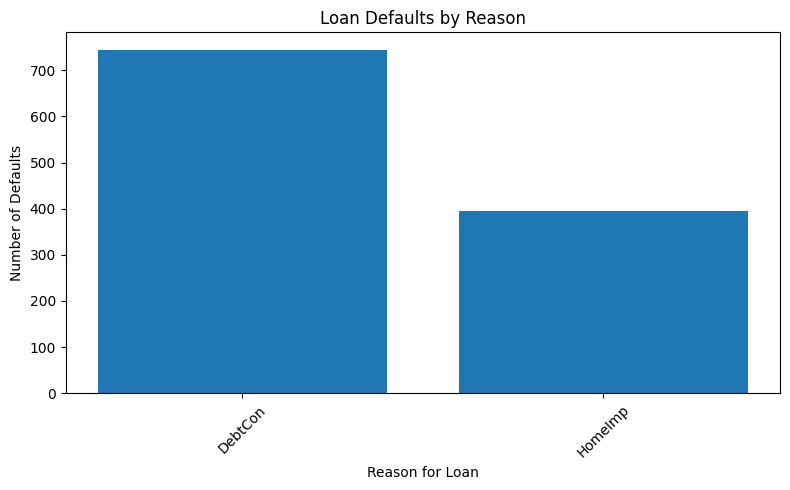

In [ ]:
defaulted = loan_pred[loan_pred['BAD'] == 1]

target_by_reason = defaulted.groupby('REASON')['BAD'].count()

plt.figure(figsize=(8, 5))
plt.bar(target_by_reason.index, target_by_reason.values)
plt.xlabel('Reason for Loan')
plt.ylabel('Number of Defaults')
plt.title('Loan Defaults by Reason')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot displays the number of loan applicants who defaulted, broken down by the reason for their loan—either debt consolidation (DebtCon) or home improvement (HomeImp). It shows that defaults are more common among those who took out loans for debt consolidation.

This pattern may suggest that individuals seeking debt consolidation are already in financially unstable situations, which could increase their risk of defaulting on new loans. However, it's important to note that this chart shows the raw number of defaults, not the default rate relative to the total number of borrowers in each category. (more people in the debtcon category defaulted, this does not necessarily mean that this is riskier, just that more people in this category defaulted)

To fully understand whether one loan reason is riskier than another, we would need to compare the proportion of defaults within each loan type.

In [ ]:
# Group by reason and calculate mean of BAD (1 = default, 0 = no default)
proportion_default_by_reason = loan_pred.groupby('REASON')['BAD'].mean().reset_index()
proportion_default_by_reason.columns = ['REASON', 'Proportion_Defaulted']
print(proportion_default_by_reason)


    REASON  Proportion_Defaulted
0  DebtCon              0.189664
1  HomeImp              0.222472


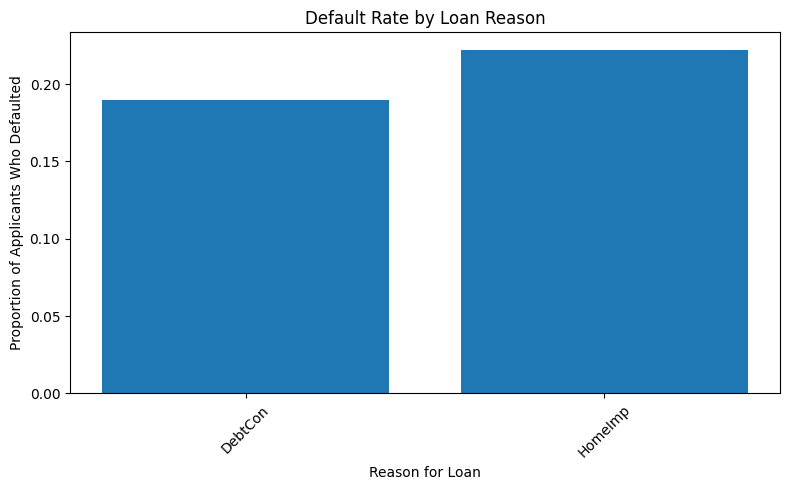

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(proportion_default_by_reason['REASON'], proportion_default_by_reason['Proportion_Defaulted'])
plt.xlabel('Reason for Loan')
plt.ylabel('Proportion of Applicants Who Defaulted')
plt.title('Default Rate by Loan Reason')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot visualizes the proportion of applicants who defaulted, grouped by the reason for their loan. Unlike a raw count, which only shows how many people defaulted in total, calculating the proportion allows us to better understand the default risk within each loan category.

I calculated proportions because a higher number of defaults in one group (like DebtCon) could simply reflect the fact that more people applied for loans in that category, not that the loans themselves are riskier. Proportions help us compare fairly across groups of different sizes.

From the plot, we can see that applicants who took out loans for home improvement (HomeImp) had a higher default rate than those who took out loans for debt consolidation (DebtCon). This suggests that, proportionally, HomeImp loans carry a higher risk of default—even though the total number of defaults may be higher in the DebtCon group.


In [ ]:
# Define bin edges and labels
bins = [0, 10000, 25000, 50000, 75000, 100000]
labels = ['0–10K', '10K–25K', '25K–50K', '50K–75K', '75K–100K']

# Safely create a new column with loan amount groups
defaulted['LOAN_GROUP'] = pd.cut(loan_pred['LOAN'], bins=bins, labels=labels)

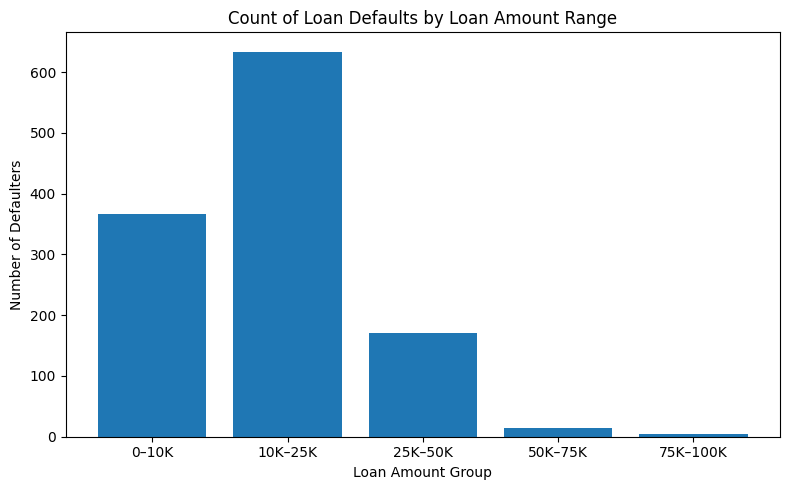

In [ ]:
loan_group_counts = defaulted['LOAN_GROUP'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(loan_group_counts.index, loan_group_counts.values)
plt.xlabel('Loan Amount Group')
plt.ylabel('Number of Defaulters')
plt.title('Count of Loan Defaults by Loan Amount Range')
plt.tight_layout()
plt.show()


Most defaulters are take out loans 10k - 25k

<ipython-input-55-1ca548c9fd3f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_default_by_group = loan_pred.groupby('LOAN_GROUP')['BAD'].mean().reset_index()


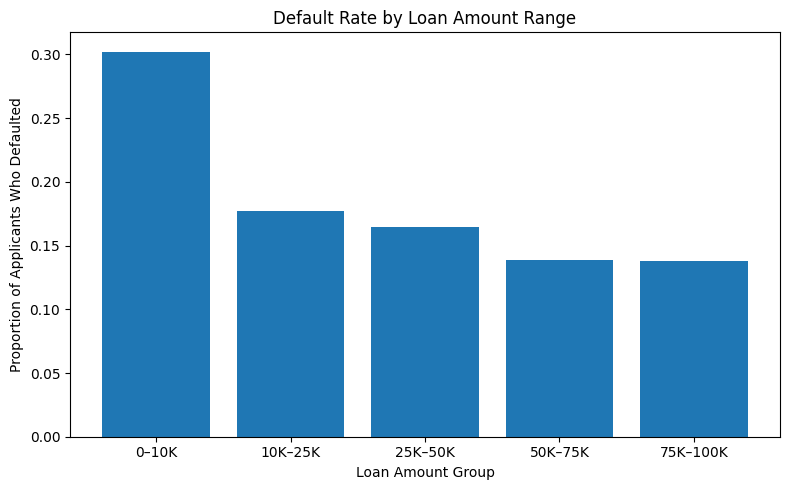

In [ ]:

loan_pred['LOAN_GROUP'] = pd.cut(loan_pred['LOAN'], bins=bins, labels=labels)

# Calculate default rate (mean of BAD = 1) for each group
proportion_default_by_group = loan_pred.groupby('LOAN_GROUP')['BAD'].mean().reset_index()

# Plot proportions
plt.figure(figsize=(8, 5))
plt.bar(proportion_default_by_group['LOAN_GROUP'], proportion_default_by_group['BAD'])
plt.xlabel('Loan Amount Group')
plt.ylabel('Proportion of Applicants Who Defaulted')
plt.title('Default Rate by Loan Amount Range')
plt.tight_layout()
plt.show()


This plot shows the proportion of applicants who defaulted, grouped by loan amount. Interestingly, the default rate is highest among borrowers who took out loans under $10,000, with over 30% of applicants in that group defaulting. As loan amounts increase, the default rate steadily decreases, with borrowers in the $50K–$100K range showing the lowest likelihood of default. This suggests that applicants requesting smaller loans may be in more financially vulnerable positions or pose a higher credit risk, while those seeking larger loans may be more financially stable or better vetted.

### **Multivariate Analysis**

In [ ]:
correlation = loan_pred[['VALUE', 'BAD']].corr().loc['VALUE', 'BAD']
print(f"Correlation between property value and default rate: {correlation:.3f}")

Correlation between property value and default rate: -0.030


## Treating Outliers

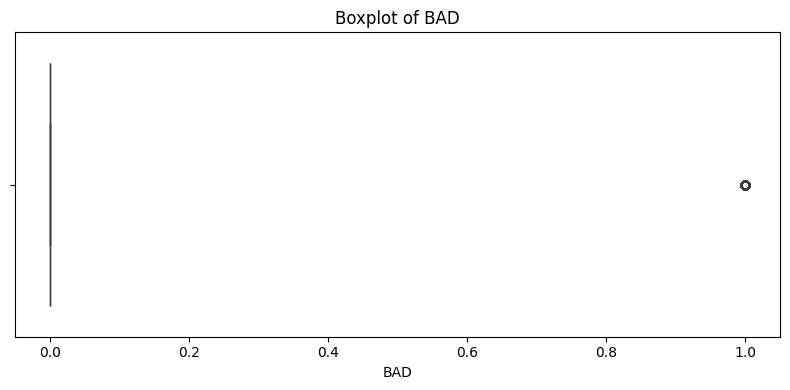

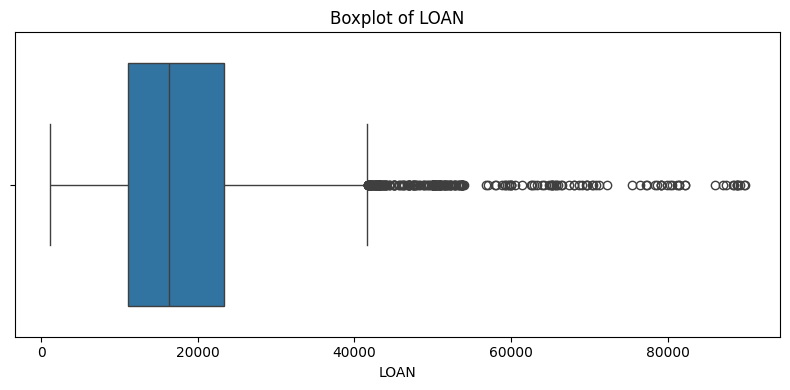

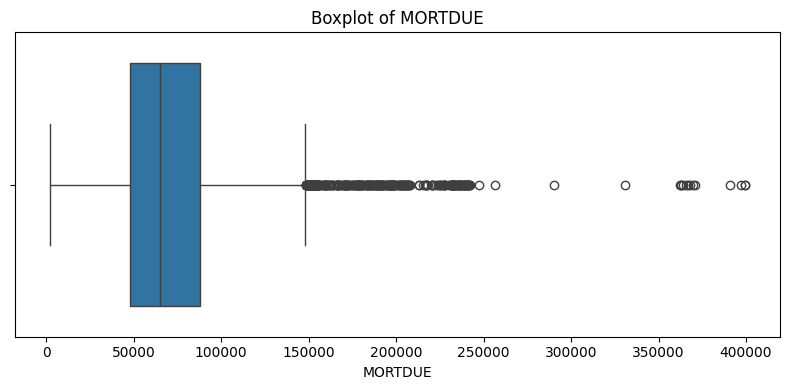

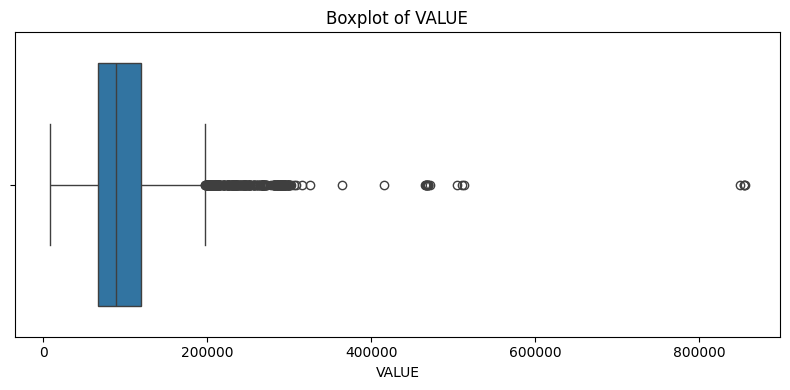

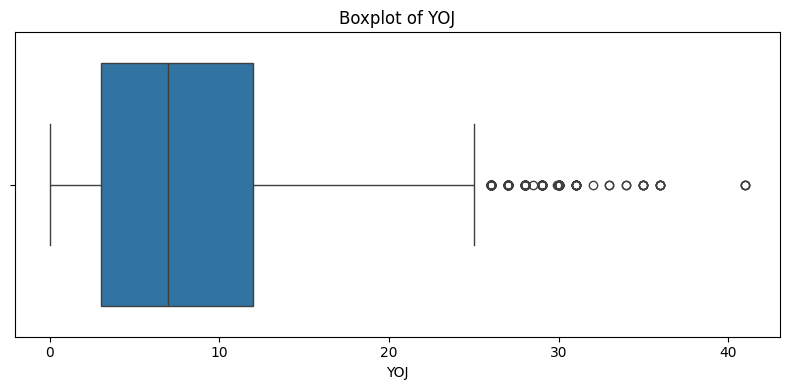

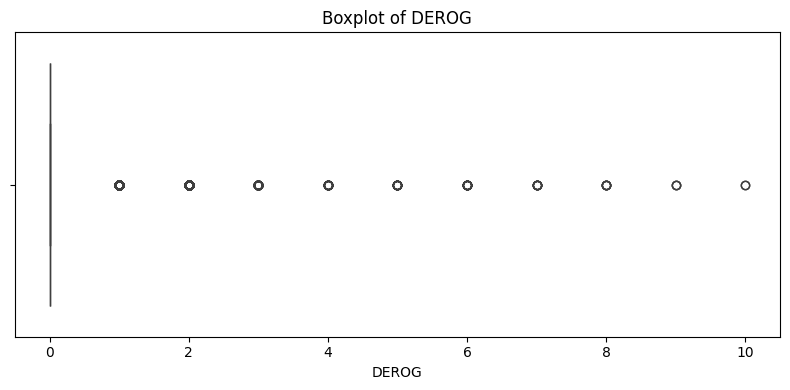

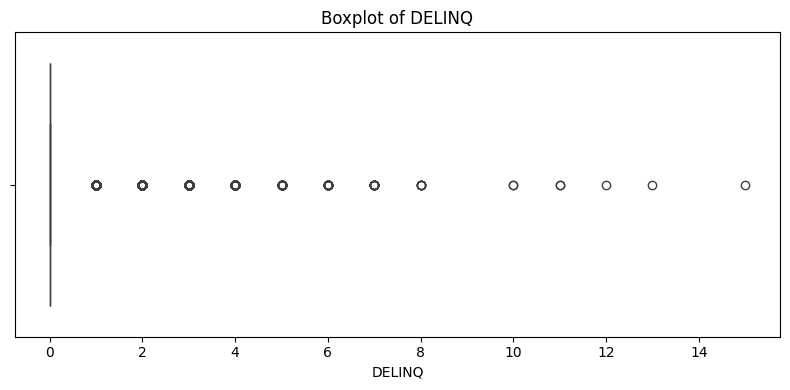

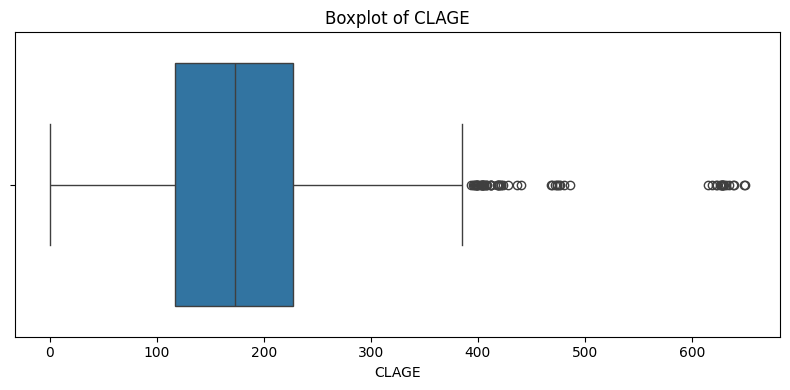

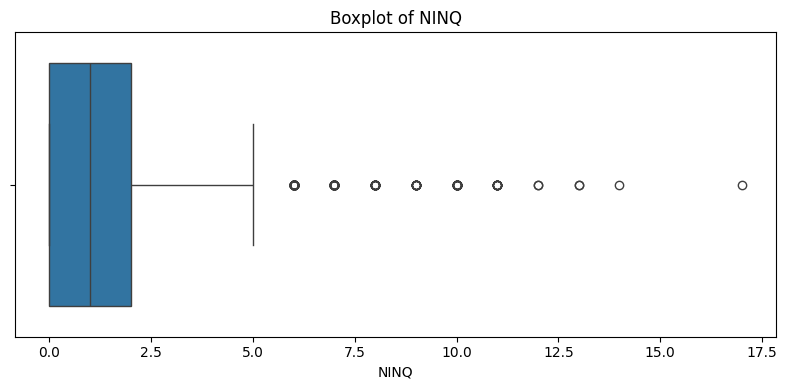

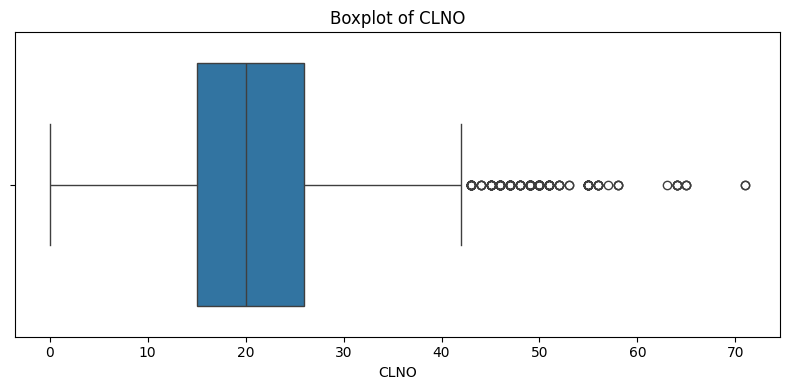

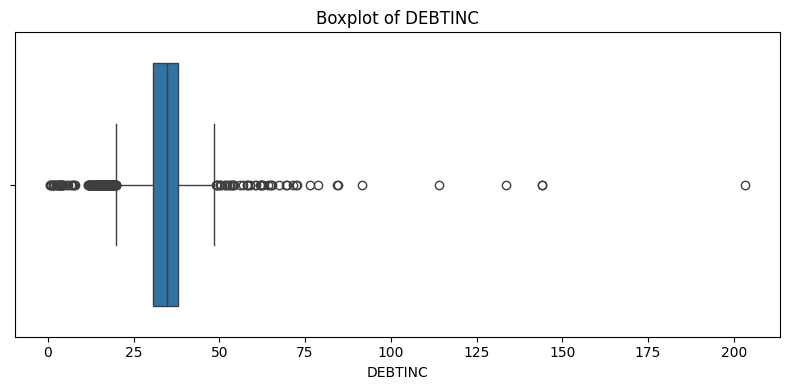

In [ ]:

for col in numbered_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=loan_pred, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


The boxplots above display the distributions of the numeric columns in the dataset. From these visualizations, we can clearly observe the presence of visible outliers in several variables. These outliers appear as points that fall well outside the interquartile range, indicating that some applicants have values significantly higher or lower than the majority of the data. Identifying these outliers is important, as they can potentially influence statistical analyses and model performance.

- BAD:As expected, this is a binary variable (0 or 1), so the boxplot isn't particularly informative. No action needed here.
- LOAN:There are a significant number of high-value outliers, but they don’t appear to be errors — they cluster and reflect realistic loan amounts. Most values are concentrated around $20,000.
- MORTDUE:Mortgage balances show many outliers, with a central cluster and additional groupings at higher values. These likely represent real mortgage amounts, possibly from more expensive properties.
- VALUE:Property value shows a wide spread and clear outliers, with both clustered and scattered high-value points. The isolated high-value outliers may skew the distribution.
- YOJ (Years on Job):Most values are within a reasonable range, but a few go above 30 or even 40. These may be accurate, especially for older applicants.
- CLAGE (Age of oldest credit line):Contains some large outliers (e.g., >800 months = 66+ years). Most data is between 0–400.
- NINQ (Number of recent credit inquiries):Many outliers here — values above 5 stand out, and some go over 15. These may indicate high-risk behavior.
- CLNO (Number of credit lines):Most values are concentrated around 20–30, but outliers extend beyond 60.
- DEROG and DELINQ:These show many small-number outliers (1–10 range) but may be meaningful. They represent the number of derogatory or delinquent credit events.
- DEBTINC (Debt-to-Income Ratio):Highly skewed, with extreme outliers (e.g., >100). Most data falls between 10–50.

In [ ]:
loan_pred[loan_pred['VALUE'] > 600000]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN_GROUP
5665,1,40000,NaN,850000.0,HomeImp,Other,17.0,0.0,0.0,186.666667,1.0,24.0,NaN,25K–50K
5706,1,41700,NaN,854112.0,HomeImp,Other,16.0,0.0,0.0,180.608878,0.0,23.0,42.071645,25K–50K
5707,1,41700,NaN,854114.0,HomeImp,Other,18.0,0.0,0.0,189.099378,1.0,23.0,43.258779,25K–50K
5752,1,43500,NaN,855909.0,HomeImp,Other,16.0,0.0,0.0,196.403636,0.0,23.0,42.985408,25K–50K


In [ ]:
loan_pred[loan_pred['CLAGE'] > 1000]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN_GROUP
3097,1,16800,87300.0,155500.0,DebtCon,Other,3.0,0.0,0.0,1154.633333,0.0,0.0,NaN,10K–25K
3679,1,19300,96454.0,157809.0,DebtCon,Other,3.0,0.0,0.0,1168.233561,0.0,0.0,40.206138,10K–25K


In [ ]:
loan_pred = loan_pred[loan_pred['CLAGE'] <= 1000]


In [ ]:
loan_pred[loan_pred['NINQ'] > 15]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN_GROUP
2593,1,15000,65019.0,26100.0,DebtCon,Other,1.6,0.0,1.0,105.466667,17.0,20.0,34.818262,10K–25K


## Treating Missing Values

The .info() output revealed a significant number of missing values in the dataset. To address the missing numeric values in columns such as MORTDUE, VALUE, YOJ, CLAGE, NINQ, and CLNO, I chose to impute them using the median. This approach is appropriate because the distributions of these variables are right-skewed, making the median a more robust measure than the mean. For the DEROG and DELINQ columns, missing values were replaced with 0, under the assumption that the absence of data may indicate no past derogatory or delinquent credit activity. Lastly, missing values in the categorical REASON and JOB columns were filled with 'Unknown' to retain those entries for analysis.

In [ ]:
# 1. Fill numeric columns with median
for col in ['MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO']:
    loan_pred[col] = loan_pred[col].fillna(loan_pred[col].median())

# 2. Fill DEBTINC with median
loan_pred['DEBTINC'] = loan_pred['DEBTINC'].fillna(loan_pred['DEBTINC'].median())

# 3. Fill DEROG and DELINQ with 0
loan_pred['DEROG'] = loan_pred['DEROG'].fillna(0)
loan_pred['DELINQ'] = loan_pred['DELINQ'].fillna(0)

# 4. Fill categorical variables
loan_pred['REASON'] = loan_pred['REASON'].fillna(loan_pred['REASON'].mode()[0])
loan_pred['JOB'] = loan_pred['JOB'].fillna('Unknown')


In [ ]:
loan_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BAD         5960 non-null   int64   
 1   LOAN        5960 non-null   int64   
 2   MORTDUE     5960 non-null   float64 
 3   VALUE       5960 non-null   float64 
 4   REASON      5960 non-null   object  
 5   JOB         5960 non-null   object  
 6   YOJ         5960 non-null   float64 
 7   DEROG       5960 non-null   float64 
 8   DELINQ      5960 non-null   float64 
 9   CLAGE       5960 non-null   float64 
 10  NINQ        5960 non-null   float64 
 11  CLNO        5960 non-null   float64 
 12  DEBTINC     5960 non-null   float64 
 13  LOAN_GROUP  5960 non-null   category
dtypes: category(1), float64(9), int64(2), object(2)
memory usage: 611.5+ KB


All the missing values have been dealt with successfuly!

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [ ]:
X = loan_pred.drop('BAD', axis=1)
y = loan_pred['BAD']


X = pd.get_dummies(X, columns=['REASON', 'JOB'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_log = log_model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[1348   55]
 [ 262  123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1403
           1       0.69      0.32      0.44       385

    accuracy                           0.82      1788
   macro avg       0.76      0.64      0.67      1788
weighted avg       0.81      0.82      0.80      1788



The confusion matrix and classification report show that the logistic regression model performs reasonably well overall, achieving an accuracy of 82%. It is particularly strong in identifying applicants who do not default on their loans, with a precision of 84% and a very high recall of 96%. This means that the model correctly identifies most of the people who will repay their loans. However, its performance drops significantly when it comes to identifying defaulters. The recall for class 1 (loan default) is only 32%, indicating that the model correctly flags less than one-third of actual defaulters. This is a concern, especially in lending scenarios where identifying high-risk applicants is crucial. Although the precision for predicting defaulters is 69%, the low recall leads to a modest F1-score of 0.44. This imbalance suggests that the model may be biased toward the majority class (non-defaulters). To adjust this, we will look at other models such as decision trees and random forests.

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred_train = tree_model.predict(x_train)

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

print("\nDecision Tree Classification Report:")
print(classification_report(y_train, y_pred_train))

Decision Tree Confusion Matrix:
[[3305   63]
 [ 475  327]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3368
           1       0.84      0.41      0.55       802

    accuracy                           0.87      4170
   macro avg       0.86      0.69      0.74      4170
weighted avg       0.87      0.87      0.85      4170



In [ ]:
# Predict and evaluate
y_pred_tree = tree_model.predict(x_test)

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Confusion Matrix:
[[1377   26]
 [ 228  157]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1403
           1       0.86      0.41      0.55       385

    accuracy                           0.86      1788
   macro avg       0.86      0.69      0.73      1788
weighted avg       0.86      0.86      0.84      1788



The decision tree model has improved performance compared to the earlier logistic regression model. It achieves an overall accuracy of 86%, which is a noticeable improvement. The model performs very well for class 0 (non-defaulters), with a precision of 0.86, recall of 0.98, and an F1-score of 0.92 — this means it's excellent at correctly identifying people who will repay their loans.

Importantly, it also shows better performance on class 1 (defaulters) than the logistic model. The recall for class 1 increased to 0.41, indicating the model is now correctly identifying 41% of actual defaulters (compared to only 32% before). The precision for defaulters is also 0.86, which means when the model does predict default, it’s usually right.

This tradeoff between slightly lower recall for non-defaulters and higher recall for defaulters suggests the tree is doing a better job of balancing classes, which is crucial in imbalanced classification problems like predicting loan defaults.



### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_leaf': [1, 2, 4, 5, 10]
}

# Initialize model
tree = DecisionTreeClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
Best F1 Score: 0.6918108916327895


In [ ]:
# Get best model from grid search
best_tree = grid_search.best_estimator_

# Predict on test set
y_pred_best_tree = best_tree.predict(x_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_tree))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_tree))

Confusion Matrix:
[[1314   89]
 [ 131  254]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1403
           1       0.74      0.66      0.70       385

    accuracy                           0.88      1788
   macro avg       0.82      0.80      0.81      1788
weighted avg       0.87      0.88      0.87      1788



The tuned decision tree model demonstrates a strong improvement in performance compared to the earlier versions. With an overall accuracy of 88%, the model shows high reliability in predicting loan outcomes. It performs exceptionally well in identifying non-defaulters, with a precision of 0.91 and a recall of 0.94, meaning it correctly classifies the vast majority of applicants who repay their loans. More importantly, the model now does a much better job identifying defaulters. The recall for class 1 (default) has increased to 0.66—more than double the performance of the original logistic regression model. This means the model is correctly flagging two-thirds of high-risk applicants, which is crucial in financial decision-making. The precision for defaulters is also solid at 0.74, indicating that when the model predicts someone will default, it is right most of the time. Overall, the model achieves a balanced performance with a strong F1-score of 0.70 for defaulters, making it a robust tool for minimizing loan risk while maintaining fair assessment across applicant groups.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

# Confusion matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[1370   33]
 [ 125  260]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1403
           1       0.89      0.68      0.77       385

    accuracy                           0.91      1788
   macro avg       0.90      0.83      0.86      1788
weighted avg       0.91      0.91      0.91      1788



he Random Forest model delivers the best performance so far among all the models you've tried. It achieves a high overall accuracy of 91%, indicating that the majority of predictions are correct. The model is especially strong at classifying non-defaulters (class 0), with a precision of 0.92 and a recall of 0.98, meaning it is highly accurate and consistent when predicting applicants who will repay their loans.

What’s even more impressive is its performance on defaulters (class 1). The recall for defaulters is 0.68, meaning the model correctly identifies 68% of people who actually default — a significant improvement compared to the logistic regression and even the tuned decision tree. The precision for defaulters is also high at 0.89, meaning when the model predicts someone will default, it is correct almost 9 out of 10 times. The resulting F1-score of 0.77 for defaulters shows a strong balance between precision and recall, especially in an imbalanced classification setting.

Overall, the Random Forest model not only maintains a high level of accuracy but also effectively balances performance across both classes, making it a powerful and reliable tool for predicting loan defaults.

<ipython-input-101-248930cba929>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='Spectral')


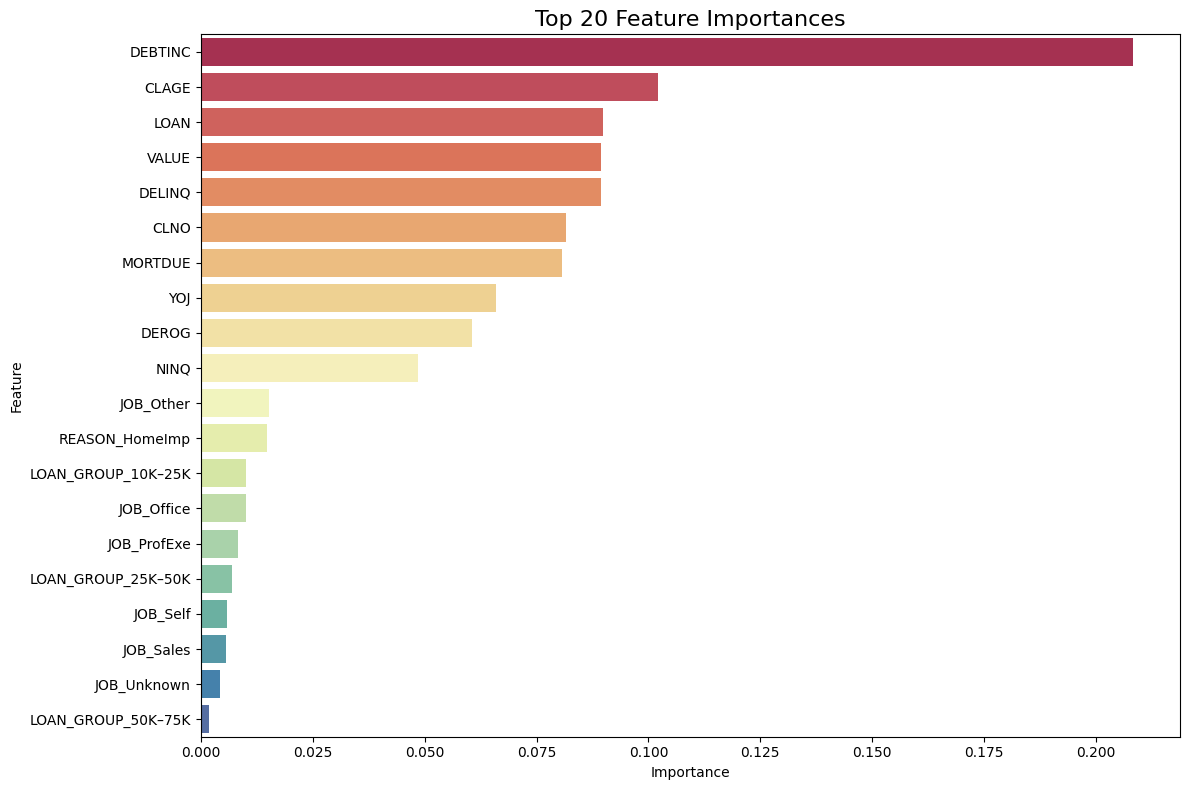

In [ ]:
features = x_train.columns
importances = rf_model.feature_importances_

# Create dataframe
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features = importance_df.head(20)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Spectral')
plt.title('Top 20 Feature Importances', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The feature importance plot from the Random Forest model reveals that DEBTINC (Debt-to-Income Ratio) is by far the most influential variable in predicting loan default, followed by CLAGE (age of the oldest credit line), LOAN amount, and property VALUE. These top features suggest that financial burden, credit history age, and loan/property size are critical factors in determining whether someone will default. Other notable contributors include DELINQ (delinquencies), CLNO (number of credit lines), and MORTDUE (mortgage amount). Categorical variables like job type and loan group contribute less but still add some predictive value. This emphasizes the importance of both financial behavior and credit history in default prediction.

### **Random Forest Classifier Hyperparameter Tuning**

In [ ]:
# Minimal parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Create model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(x_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
y_pred = best_rf.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1379   24]
 [ 186  199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1403
           1       0.89      0.52      0.65       385

    accuracy                           0.88      1788
   macro avg       0.89      0.75      0.79      1788
weighted avg       0.88      0.88      0.87      1788



The tuned Random Forest model achieved an overall accuracy of 88%, demonstrating strong performance. It performs especially well on predicting class 0 (non-defaulters), with a precision of 88% and a recall of 98%, meaning it correctly identifies almost all non-defaulters. For class 1 (defaulters), the model shows a precision of 89%, which is high, but a lower recall of 52%, indicating that nearly half of the defaulters were not correctly identified. The F1-score for class 1 is 0.65, showing moderate balance between precision and recall. While the model does better than previous versions at capturing defaulters, the recall gap suggests it may still miss some riskier applicants—an important factor to consider depending on the cost of false negatives.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- Out of all the models, the Random Forest consistently outperformed the other models, It especially did a great job in balancing the precision adn recall for the default class, making it the most relaiable for risk reduction.

**2. Refined insights:**
- Debt-to-Income ratio (DEBTINC) was the most influential feature in predicting default.

- Other top predictors included CLAGE (age of credit line), LOAN amount, property VALUE, and number of delinquencies (DELINQ).

- Applicants requesting smaller loans (especially under $10K) were more likely to default.

- Individuals applying for Home Improvement loans had a higher proportion of defaults compared to those seeking Debt Consolidation loans.


**3. Proposal for the final solution design:**
- Based on model performance and feature interpretability, I propose adopting the Random Forest Classifier as the final model. It provides the best balance between overall accuracy and the ability to identify defaulters. Its high precision (89%) and recall (68%) for the default class ensure it captures risky applicants without flagging too many falsely.

- Additionally, Random Forest offers feature importance rankings, which are invaluable for business stakeholders to understand which factors most influence loan risk. While there is still room to improve recall (e.g., via ensemble stacking or further tuning), this model currently offers the most dependable and interpretable solution for real-world deployment.